<a href="https://colab.research.google.com/github/omkarr2102/Datathon-22/blob/main/OR_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team Name - OR**

######***Member - omkar raghatwan - ojn_b19@ce.vjti.ac.in***
**Track** - EDA

____________________________________________________________________________

For the EDA track i recieved a data set which has information about various companies hiring interns and job profile they are offering.

The data-set have 13-14 columns and about 8k rows.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from scipy.stats import norm


import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataZen.csv to DataZen.csv


In [ ]:
df=pd.read_csv(r"DataZen.csv")
df.head()

,id,protected,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category
0,1,54622,Accounts,Cytomol Labs,Secunderabad,6.0,8000,31 Jan' 22,33 applicants,"Accounting , Tally ,",NaN,1,0,Commerce
1,2,27305950,Graphic Design,Varistor Solar,Ajmer,6.0,6000,5 Feb' 22,Be an early applicant,"Adobe Photoshop ,","Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
2,3,22681506,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000,10 Feb' 22,48 applicants,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...","Certificate , Flexible work hours ,",1,0,Graphic Design
3,4,57706912,Marketing,Glamanand Entertainment,Work From Home,4.0,5000,7 Feb' 22,53 applicants,"English Proficiency (Spoken) , English Profici...","Certificate , Letter of recommendation , Flexi...",6,0,Marketing
4,5,43990,Accounts,SocialWell,Bhubaneswar,6.0,6000,3 Feb' 22,Be an early applicant,"Accounting ,","Certificate , Informal dress code ,",1,0,Commerce


As you can see we've no null entries which means given dataset is almost upto the mark but still few entries are not in the format of the way we want; to plot graphs and protected column is private information and protected for a reason , so i'll be dropping "protected" column. Same goes with 'Apply By' column though reason behind dropping this coulmn is it's not much important comparatively w.r.t other important instances as of now.
We'll be replacing few attributes like missing/Unknown to zero. 

In [ ]:
df.drop(['protected','Apply By'],inplace=True,axis=1)

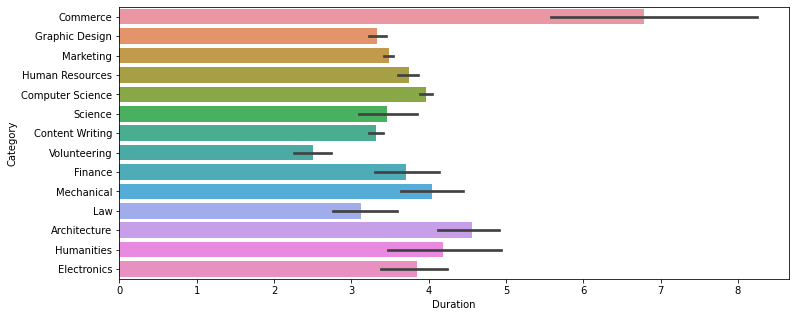

In [ ]:
figure = plt.figure(figsize=(12,5))
sns.barplot(y="Category",x="Duration",data=df)
plt.show()

Now we know commerce sector has more working hours compare to other sectors but will it be getting maximum stipend? Let's Find out.

before considering stipend to plot graph it is observed that Few Stipend values are 'unknown', so we can't plot graph if there is unknown variable.So first things first we'll make 'Stipend_per_month' column suitable to plot any graph.

In [ ]:
df['Stipend_per_month'] = df['Stipend_per_month'].str.replace('Unknown', '0')
df[['Stipend_per_month']] = df[['Stipend_per_month']].apply(pd.to_numeric)

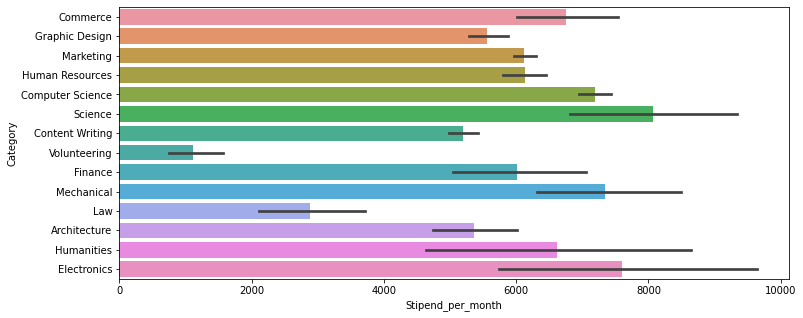

In [ ]:
figure = plt.figure(figsize=(12,5))
sns.barplot(y="Category",x="Stipend_per_month",data=df)
plt.show()

as you can see commerce sector doesn't get maximum stipend per month though it has max working hours.
We know the stipend and duration of work now lets see how much applicants are availabe for each job category.

In [ ]:
df['Applicants'] = df['Applicants'].str.replace(' applicants', '')
df['Applicants'] = df['Applicants'].str.replace('Be an early applicant', '0')
df['Applicants'] = df['Applicants'].str.replace('+', '')

df[['Applicants']] = df[['Applicants']].apply(pd.to_numeric)

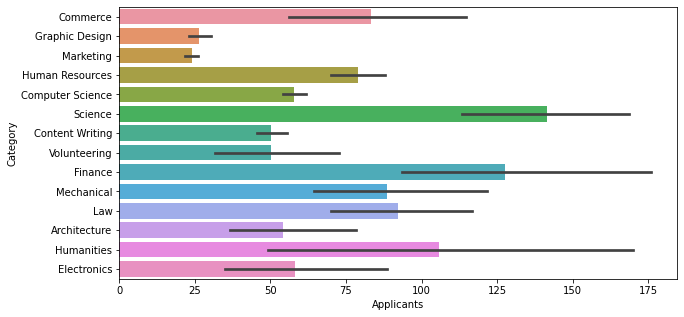

In [ ]:
figure = plt.figure(figsize=(10,5))
sns.barplot(y="Category",x="Applicants",data=df)
plt.show()

The number of openings are very less compare to the applicants companies are recieving which leads to massive competition and ultimately job uncertainity for applicants who doesn't have good experience + industry skills irrespective of the fact that they are the freshers rooting to gain industry experience...we can tell this as per following observation: 

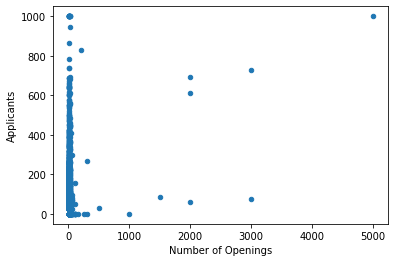

In [ ]:
# plot the features
df.plot(kind="scatter", x='Number of Openings', y='Applicants')

Further lets find out what are ranges of applications , thier working hours and stipends they are getting.
First lets see how much unique attributes are there in the dataset.

In [ ]:
for i in "Stipend_per_month","Applicants","Duration":
    print(i+":"+str(df[i].unique())+"\n")

Stipend_per_month:[8.00000000e+03 6.00000000e+03 1.50000000e+04 5.00000000e+03
 1.50000000e+03 1.00000000e+04 3.00000000e+03 2.00000000e+03
 9.00000000e+03 0.00000000e+00 1.00000000e+03 2.50000000e+03
 4.00000000e+03 2.50000000e+04 1.20000000e+04 7.00000000e+03
 2.00000000e+04 5.00000000e+02 1.20000000e+03 5.00000000e+04
 3.50000000e+03 1.10000000e+04 2.50000000e+02 8.00000000e+02
 1.80000000e+04 7.50000000e+03 3.50000000e+04 2.33333333e+03
 6.70000000e+03 4.00000000e+02 6.50000000e+03 2.66666667e+03
 1.60000000e+04 4.70000000e+03 8.50000000e+03 5.50000000e+03
 1.30000000e+04 6.66666667e+03 1.25000000e+04 4.50000000e+03
 1.66670000e+04 3.00000000e+04 3.33333333e+03 2.10000000e+04
 4.40000000e+03 2.65000000e+02 1.70000000e+04 1.40000000e+04
 2.20000000e+04 1.38000000e+04 2.20000000e+03 9.99900000e+03
 1.30000000e+03 3.00000000e+02 1.66666667e+03 2.40000000e+04
 1.25000000e+03 3.33333333e+02 2.09900000e+03 3.30000000e+03
 2.80000000e+03 8.00000000e+00 4.00000000e+04 2.80000000e+04
 1.980

 

*   'Duration' column world work over here but Applicants and stipend column have various unique vaues which will become messy when we try to analyse.

Solution for this problem would be seggregating all those values into range groups. 




In [ ]:
df.head()

,id,Title,Company,Location,Duration,Stipend_per_month,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category
0,1,Accounts,Cytomol Labs,Secunderabad,6.0,8000.0,33,"Accounting , Tally ,",NaN,1,0,Commerce
1,2,Graphic Design,Varistor Solar,Ajmer,6.0,6000.0,0,"Adobe Photoshop ,","Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
2,3,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,15000.0,48,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...","Certificate , Flexible work hours ,",1,0,Graphic Design
3,4,Marketing,Glamanand Entertainment,Work From Home,4.0,5000.0,53,"English Proficiency (Spoken) , English Profici...","Certificate , Letter of recommendation , Flexi...",6,0,Marketing
4,5,Accounts,SocialWell,Bhubaneswar,6.0,6000.0,0,"Accounting ,","Certificate , Informal dress code ,",1,0,Commerce


**Put applications in ranges**

0-100 → expected

100-500 → above-expected

500 + → unexpected

In [ ]:
m=len(df.axes[0])
n=len(df.axes[1])

applicants = ["expected","above-expectation", "unexpected"]
x=-1
for i in range(m):
    if df.iloc[i, 6] <= 100:
        x = 0
    elif df.iloc[i,6]<= 500:
        x = 1
    else:
        x = 2
    df.iloc[i, 6] = applicants[x]

**Put Stipend amount in ranges**

0(unpaid)-7000 → Less

7000-14000 → Moderate

14000 + → High

In [ ]:
stipend = ["Less","Moderate", "High"]
y=-1
for i in range(m):
    if df.iloc[i, 5] <= 7000:
        y = 0
    elif df.iloc[i,5]<= 14000:
        y = 1
    else:
        y = 2
    df.iloc[i, 5] = stipend[y]

In [ ]:
df.head()

,id,Title,Company,Location,Duration,Stipend_per_month,Applicants,Skills Required,Perks,Number of Openings,Incentives,Category
0,1,Accounts,Cytomol Labs,Secunderabad,6.0,Moderate,expected,"Accounting , Tally ,",NaN,1,0,Commerce
1,2,Graphic Design,Varistor Solar,Ajmer,6.0,Less,expected,"Adobe Photoshop ,","Certificate , Letter of recommendation , Flexi...",2,0,Graphic Design
2,3,Graphic Design,Rugas Technologies Private Limited,Work From Home,2.0,High,expected,"Adobe Photoshop , Adobe XD , CSS , Figma , HTM...","Certificate , Flexible work hours ,",1,0,Graphic Design
3,4,Marketing,Glamanand Entertainment,Work From Home,4.0,Less,expected,"English Proficiency (Spoken) , English Profici...","Certificate , Letter of recommendation , Flexi...",6,0,Marketing
4,5,Accounts,SocialWell,Bhubaneswar,6.0,Less,expected,"Accounting ,","Certificate , Informal dress code ,",1,0,Commerce


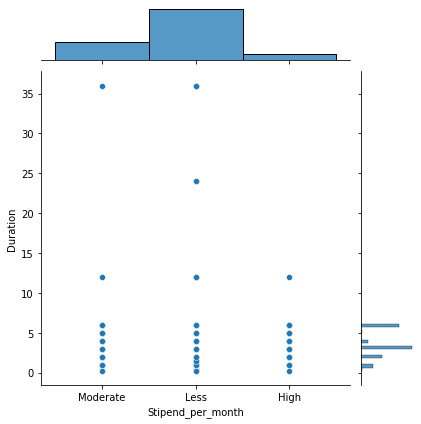

In [ ]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='Stipend_per_month', y='Duration', data=df, height=6)



*   In above seaborn jointplot it is observed that internship/job's working duration is almost equally distributed comparing the stipends they are getting; execept the High stipend profile which don't have any long period office hours.


*   Also we can say that number of people applying for Less Stipend (i.e, range of: unpaid-7000Rs) by obsrving the histogram.



In [ ]:
for i in "Skills Required","Category":
    print(i+":"+str(df[i].unique())+"\n")

Skills Required:['Accounting , Tally , ' 'Adobe Photoshop , '
 'Adobe Photoshop , Adobe XD , CSS , Figma , HTML , Sketch , ' ...
 'Adobe After Effects , Adobe Creative Suite , Adobe Illustrator , Adobe Photoshop , Adobe Premiere Pro , Figma , GIMP , '
 'Client Relationship , English Proficiency (Spoken) , Instagram Marketing , '
 'Digital Marketing , Email Marketing , English Proficiency (Spoken) , Facebook Marketing , Hindi Proficiency (Spoken) , MS-Excel , MS-Word , ']

Category:['Commerce' 'Graphic Design' 'Marketing' 'Human Resources'
 'Computer Science' 'Science' 'Content Writing' 'Volunteering' 'Finance'
 'Mechanical' 'Law' 'Architecture' 'Humanities' 'Electronics']



Now lets consider Category column and analayse it with other attributes.

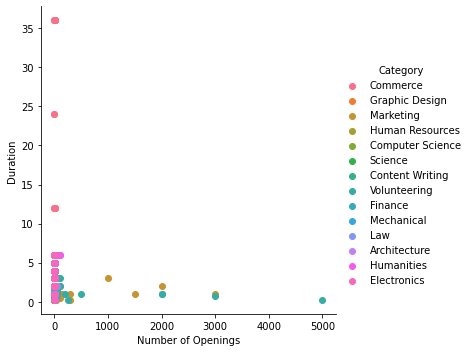

In [ ]:
sns.FacetGrid(df, hue='Category', height=5).map(plt.scatter, 'Number of Openings', 'Duration').add_legend()

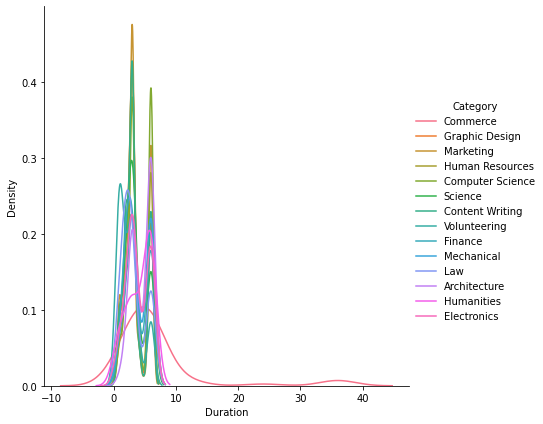

In [ ]:
sns.FacetGrid(df, hue='Category', height=6) \
   .map(sns.kdeplot, 'Duration') \
   .add_legend()

In conclusion of above two graph, it is observed that:


*   comparatively Commerce sector has more number of vacancies and working hours.
*   Volunteering,Finance,Mechanical these sectors schedule vacancies in bulk


*   Maximum working hours doesn't indicates maximum stipend, It completely depends on job profile of applicants.





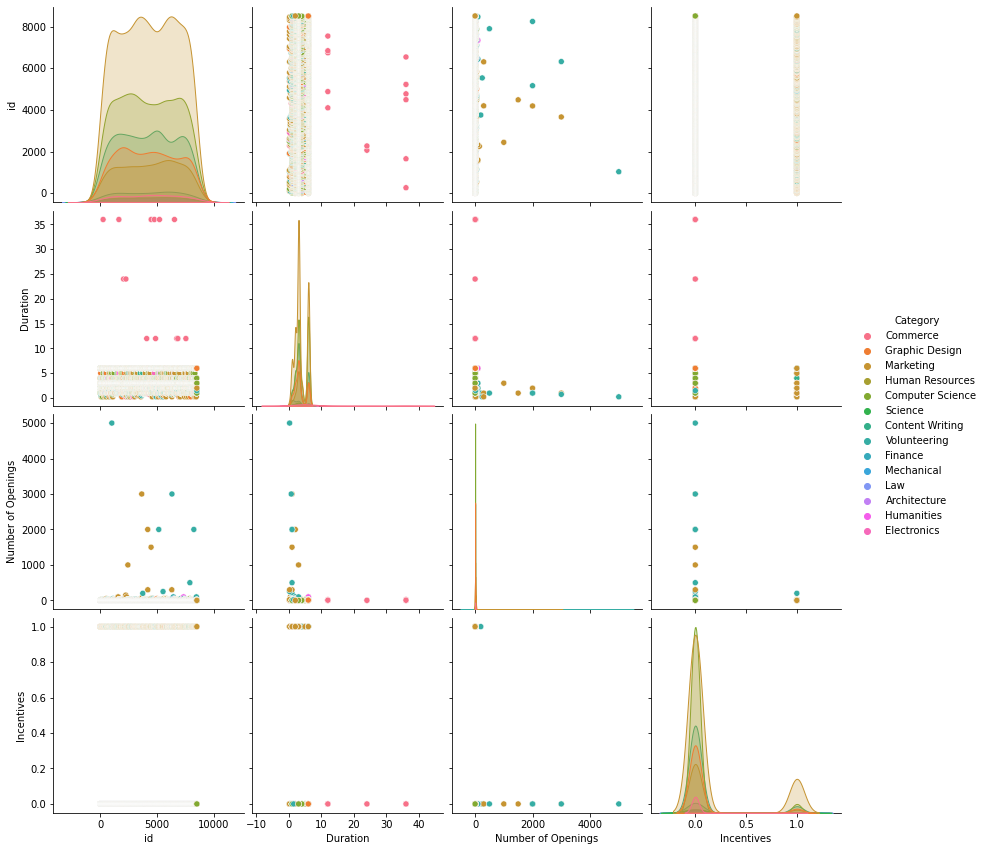

In [ ]:
sns.pairplot(df, hue='Category', height=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3764777d0>,
      dtype=object)

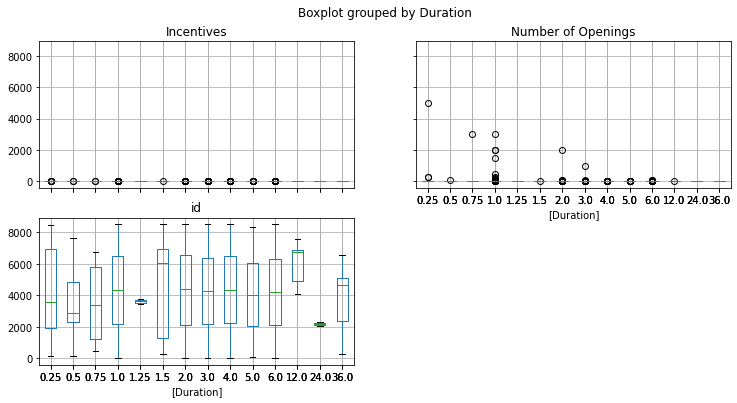

In [ ]:
# Box plot grid
df.boxplot(by='Duration', figsize=(12, 6))

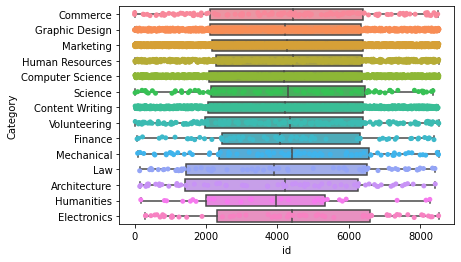

In [ ]:
ax = sns.boxplot(y='Category', x='id', data= df , width=0.72)
ax = sns.stripplot(y='Category', x='id', data= df, jitter=True)

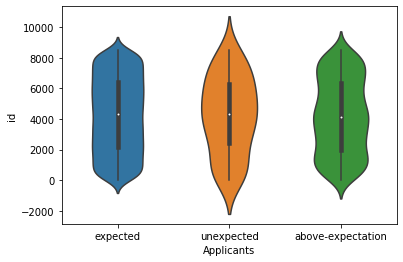

In [ ]:
sns.violinplot(x='Applicants', y='id', data=df, width=0.5)

reading/understanding boxplot:

(We'll consider the boxplot for duration 1.5hours because it has large interquartile area)

*  min: 200 and max:8100 aprox.
*  Median:6000

*   Q1:1400  and  Q3:7000
*   It is visible that interquartile ranges of Moderate working hours is more consistent.


reading/understanding violinplot:


*   A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated [Kernal density plot ](https://en.wikipedia.org/wiki/Kernel_density_estimation) on each side.
*   We can see that expected violin has only one mode whereas unexpected and above-expected violin has 2, 3 modes respectively which indicates that they contain 2, 3 subpopulation respectively & has smaller interquartile area and median.






In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataZtest.csv to DataZtest.csv


In [ ]:
df=pd.read_csv(r"DataZtest.csv")

df.drop(['protected'],inplace=True,axis=1)
df.head()

,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives
0,1,Python Development,Sumago Infotech,Nashik,6.0,8000,8 Feb' 22,Be an early applicant,NaN,"Certificate , Informal dress code , 5 days a w...",10,1
1,2,Web Development,Kuberlo,Work From Home,1.0,5000,31 Jan' 22,140 applicants,"AngularJS , CSS , HTML , JavaScript ,","Certificate , Letter of recommendation , Flexi...",1,0
2,3,Business Development (Sales),Aviz Home Healthcare Private Limited,Work From Home,5.0,1000,1 Feb' 22,Be an early applicant,NaN,"Certificate , Letter of recommendation ,",1,0
3,4,Electronics Engineering,Motion Drivetronics Private Limited (Mechtex),Navi Mumbai,3.0,5000,10 Feb' 22,Be an early applicant,"Arduino , ARM Microcontroller , C++ Programmin...","Certificate , Letter of recommendation , Job o...",1,0
4,5,Content Writing,Cyrus Biz Solutions,Work From Home,1.0,2000,11 Feb' 22,73 applicants,"Blogging , Creative Writing , English Proficie...","Certificate , Letter of recommendation , Flexi...",1,0


In [ ]:
df['Stipend_per_month'] = df['Stipend_per_month'].str.replace('Unknown', '0')
df[['Stipend_per_month']] = df[['Stipend_per_month']].apply(pd.to_numeric)

In [ ]:
df['Applicants'] = df['Applicants'].str.replace(' applicants', '')
df['Applicants'] = df['Applicants'].str.replace('Be an early applicant', '0')
df['Applicants'] = df['Applicants'].str.replace('+', '')
df[['Applicants']] = df[['Applicants']].apply(pd.to_numeric)

In [ ]:
import altair as alt
df = df[:5000]

heatmap = alt.Chart(df).mark_rect().encode(
    alt.X('Stipend_per_month:Q', bin = True),
    alt.Y('Applicants:Q', bin = True),
    alt.Color('count()', scale = alt.Scale(scheme = 'greenblue'))
)

points = alt.Chart(df).mark_circle(
    color = 'black',
    size = 5,
).encode(
    x = 'Stipend_per_month:Q',
    y = 'Applicants:Q',
)

heatmap + points

alt.LayerChart(...)



*   In reference with above graph we can state that for less stipend per month as well as less opening vacancies crowd is getting attracted to avoid pressure work.



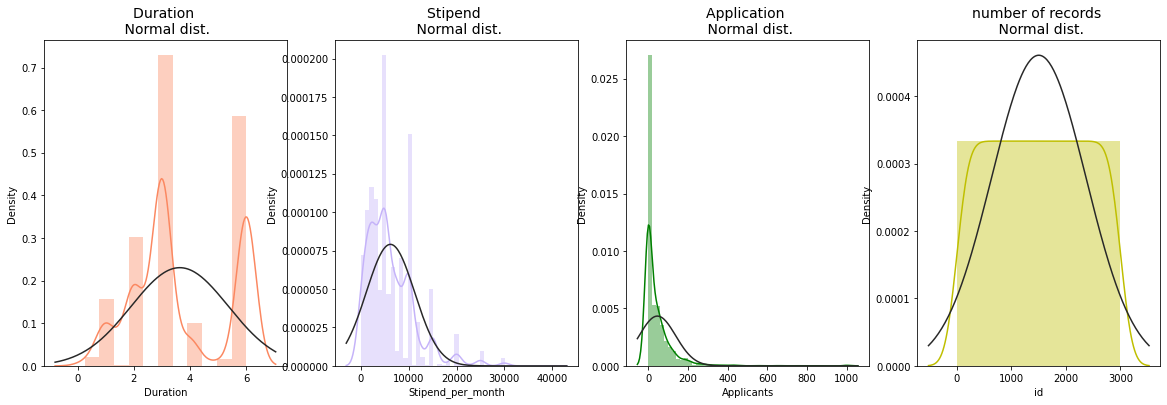

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
f, ax = plt.subplots(1,4, figsize = (20,6))

sns.distplot(df['Duration'],fit=norm, color='#FB8861', ax = ax[0])
ax[0].set_title('Duration \n Normal dist.', fontsize=14)

sns.distplot(df['Stipend_per_month'],fit=norm, color='#C5B3F9', ax = ax[1])
ax[1].set_title('Stipend \n Normal dist.', fontsize=14)

sns.distplot(df['Applicants'],fit=norm,color='g', ax = ax[2])
ax[2].set_title('Application \n Normal dist.', fontsize=14)

sns.distplot(df['id'],fit=norm, color='y', ax = ax[3])
ax[3].set_title('number of records \n Normal dist.', fontsize=14)

plt.show()

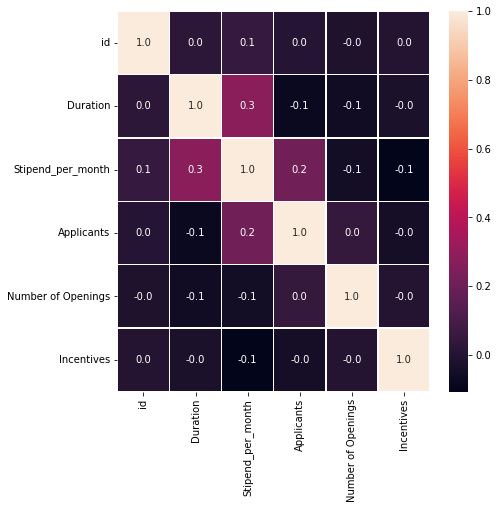

In [ ]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
df.head()

,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Number of Openings,Incentives
0,1,Python Development,Sumago Infotech,Nashik,6.0,8000.0,8 Feb' 22,Be an early applicant,NaN,"Certificate , Informal dress code , 5 days a w...",10,1
1,2,Web Development,Kuberlo,Work From Home,1.0,5000.0,31 Jan' 22,140 applicants,"AngularJS , CSS , HTML , JavaScript ,","Certificate , Letter of recommendation , Flexi...",1,0
2,3,Business Development (Sales),Aviz Home Healthcare Private Limited,Work From Home,5.0,1000.0,1 Feb' 22,Be an early applicant,NaN,"Certificate , Letter of recommendation ,",1,0
3,4,Electronics Engineering,Motion Drivetronics Private Limited (Mechtex),Navi Mumbai,3.0,5000.0,10 Feb' 22,Be an early applicant,"Arduino , ARM Microcontroller , C++ Programmin...","Certificate , Letter of recommendation , Job o...",1,0
4,5,Content Writing,Cyrus Biz Solutions,Work From Home,1.0,2000.0,11 Feb' 22,73 applicants,"Blogging , Creative Writing , English Proficie...","Certificate , Letter of recommendation , Flexi...",1,0


Lets group the stipend per month into 3 groups as follows which will eventually help us plotting graph and to perform analysis.

In [ ]:
Less = df[df['Stipend_per_month'] <= 7000]
Moderate = df[(df['Stipend_per_month']>7000) & (df['Stipend_per_month']<=14000)]
High = df[df['Stipend_per_month']>14000]
print("There are {} ({:.2f}%) Less amount of stipend, {} ({:.2f}%) Moderate amount of stipend and {} ({:.2f}%) High amount of stipend.".format(len(Less), 100*len(Less)/len(df), len(Moderate), 100*len(Moderate)/len(df), len(High), 100*len(High)/len(df),))

There are 2027 (67.57%) Less amount of stipend, 725 (24.17%) Moderate amount of stipend and 248 (8.27%) High amount of stipend.


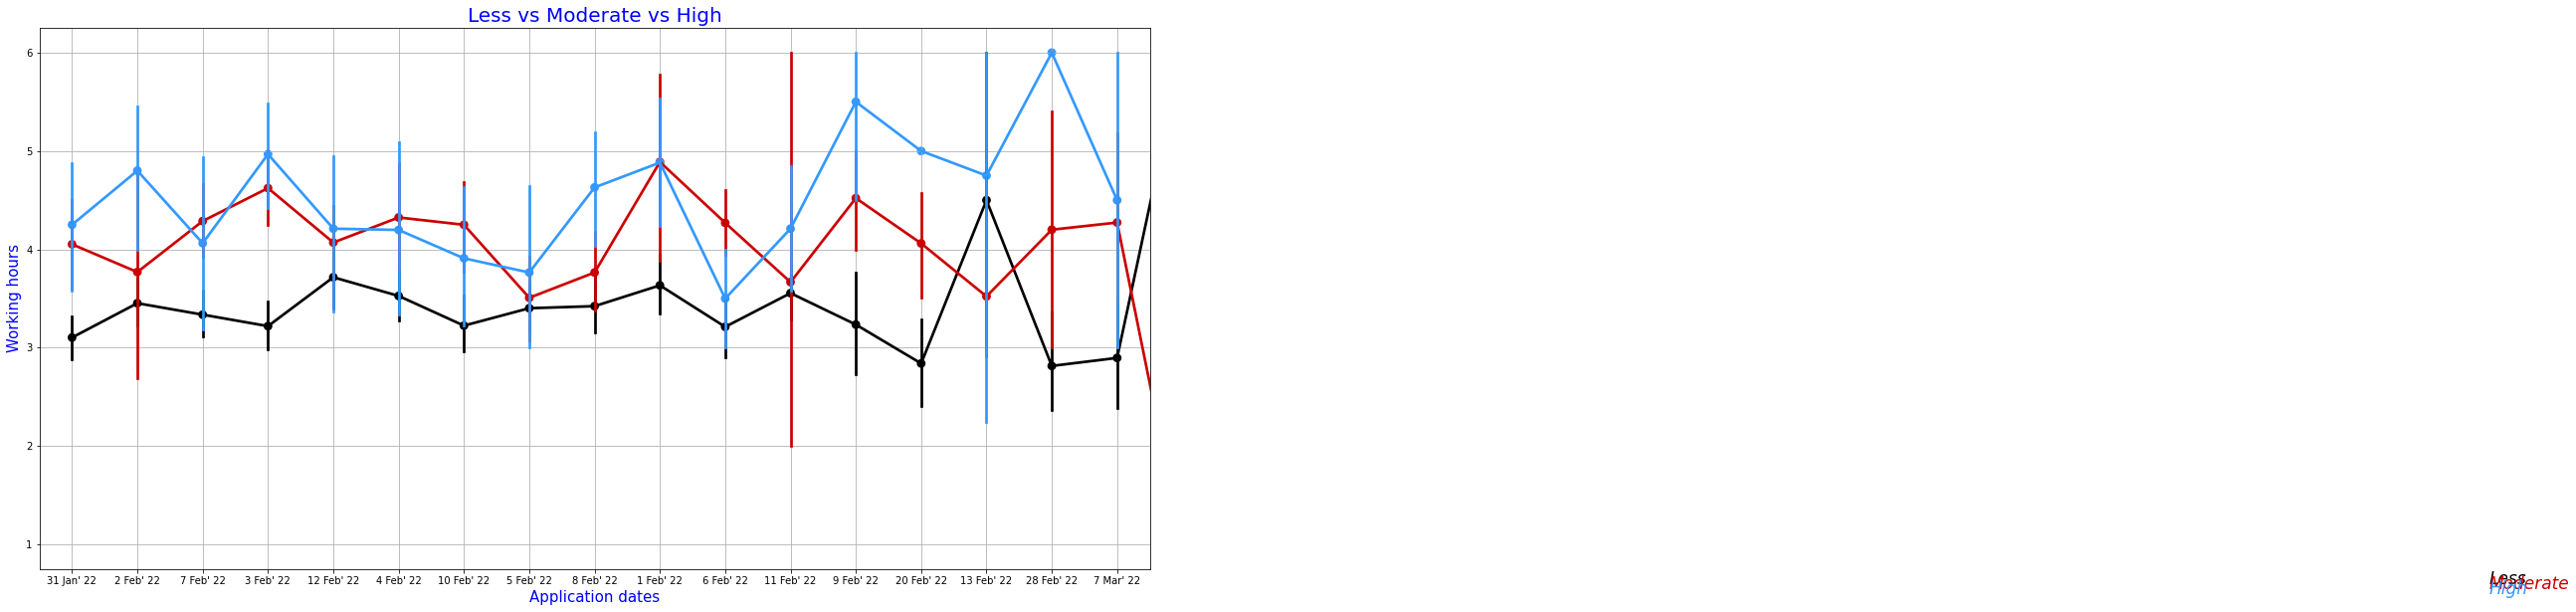

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='Apply By',y='Duration',data=Less,color='black',alpha=0.8)
sns.pointplot(x='Apply By',y='Duration',data=Moderate,color='#CC0000',alpha=0.8)
sns.pointplot(x='Apply By',y='Duration',data=High,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Less',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Moderate',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'High',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Application dates',fontsize = 15,color='blue')
plt.ylabel('Working hours',fontsize = 15,color='blue')
plt.title('Less vs Moderate vs High',fontsize = 20,color='blue')
plt.grid()
plt.show()

In above Stipend variety graph of Less vs Moderate vs High:


1.   Working hours of High stipend profile job is increasing by the time.
2.   whereas working hours of Moderate & Less profile job is constant throughout the timeline.



In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

def donutchart(df,col):
    trace = go.Pie(labels = df[col].unique(),values=df[col].value_counts(),textfont=dict(size=18),opacity = 0.5,marker=dict(colorssrc = 'tealrose',line=dict(color = '#000000',width = 1.5)),hole = 0.6)
    layout = dict(title = f'Donut chart of {col}')
    fig = dict(data = [trace],layout = layout)
    py.iplot(fig)

In [ ]:
products = df[df['Number of Openings'].notna()].reset_index(drop = True)

In [ ]:
# frequency with "Company" 
freq = products.groupby(['Number of Openings']).count()
freq.sort_values(by=['Duration'], ascending=False )


,id,Title,Company,Location,Duration,Stipend_per_month,Apply By,Applicants,Skills Required,Perks,Incentives
Number of Openings,,,,,,,,,,,
2,936,936,936,936,936,936,936,936,744,884,936
1,750,750,750,750,750,750,750,750,562,705,750
5,329,329,329,329,329,329,329,329,247,316,329
3,259,259,259,259,259,259,259,259,190,245,259
4,226,226,226,226,226,226,226,226,158,214,226
10,208,208,208,208,208,208,208,208,144,203,208
20,117,117,117,117,117,117,117,117,65,115,117
6,59,59,59,59,59,59,59,59,41,56,59
15,39,39,39,39,39,39,39,39,25,37,39


In [ ]:
donutchart(freq,'Location')

#**Inference**:


1.   Because of workload, deadlines, office pressure people are slightly not in favour of high profile jobs which has considerably more working hours.

1.   As Gen-Z mainly focuses(talking in general terms) on making money people tend to join Less working hour profile. On other hand freshers joning low stipend job profile to gain industry experience might be the other case.

1.   Because of covid-19 WFH(work from home) seems to be fair and decent option for many applicants hence the maximum application belongs to this category.
2.   Applicants has to face More Competitive environment because of less job vacancy offered by particular company.
 

5.   Commerce and science sector is always leading the hiring procedure as per the analysis, So focusing on other sectors is necessary because all sectors together contribute to india's economy.






#**Conclusion**:



1.   Because of more competitive environment applicants has to face challenges like rejection, living up with expectations which may lead to job uncertainty. As concluded we got many low stipend job vacancy with approx range of 0-10 opening seats.So if companies can atleast raise their low stipend job intake it'd be beneficial for company as well as fresher applicants seeking to gain industrty experience. 

1.   In rampant range the applicants are opted for work from home job (WFH), surely they'll have their own reasons. But by this information we know the general tendency of people i.e., after effects of lockdown people prefer to work in online mode.
2.   Maximum working hours job doesn't ultimatey give high salary profile it is totally dependent on the type of job profile applicants gonna choose And as per the analysis it's observed that though commerce sector has more working hourse , science-graphic design sectors get more amount of salary.Most of the Gen-Z has understood his fact hence they are applying accordingly to make more money,


4.   Its is observed that Moderate-Less stipend Jobs remains consistent throughout the timline of dataset.But High stipend job shows linear growth w.r.t. time.It's because generally employee apply for higher profile jobs after gaining professional industry experince.   



#***Use Case***:



*   For campus interviews through university college's companies can use above analysis to fulfill their intake capacity accordingly as discussed in conlcusion part.

*   Companies should at least increase their low stipend job vacancies which will benifit company as well as fresher applicants.

*   While determining mode of important/confidental work company should provide WFH option as it'll not only increase the productivity but also the efficiency of the company. 
*   Internal promotion seems viable option for deserving applicants as we saw people tend to take high profile job after gaining industry experience.


*   Applicants can also use above analysis to determine which Catergoy-Company-Location they should select from the available intake options.


*   Can be use to determine the mathematical/statistical terms for particular Category-Location-Company.


*   Such kind of analysis is also useful in early stage evaluation of 12th passouts or FY's. Students who are struggling to select one specific domain by observing various options available with the help of statisfics and little bit of visualization they will be able to determine the domain they want to work with. On Least possibility they can at least eliminate non-suitable options.

example:
I am CS student(fresher) who is interested in Web development. I want moderate amount of stipend with Less working hours because i'll be in learning phase.So first i will look up to Web Devlopment category then its Stipend_per_month distribution graphs. Then with the help of heatmap i'll filter out the competitive  area. Then I'll refer Stipend vs Apply by graph to get rough idea about crowd. further donut chart for loaction will help me in selecting the job job location. Lastly i can find out which companies are offering me the perks i want and yeahh i'm ready to go as an applicant in industry as a fresher.





............
